In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [64]:
# 자전거 데이터 캐글
# https://www.kaggle.com/c/bike-sharing-demand/overview

In [65]:
# 데이터 불러오기
bike_df = pd.read_csv('data/bike_train.csv', parse_dates=['datetime'])
bike_df.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6737,2012-03-18 00:00:00,1,0,0,1,18.86,22.725,88,12.9980,27,80,107
6852,2012-04-03 20:00:00,2,0,1,1,22.96,26.515,24,8.9981,54,325,379
8616,2012-08-01 09:00:00,3,0,1,2,27.88,31.820,74,6.0032,34,316,350
2435,2011-06-09 09:00:00,2,0,1,1,34.44,39.395,49,0.0000,20,148,168
341,2011-01-15 17:00:00,1,0,0,2,13.12,15.150,36,19.0012,29,54,83


In [66]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [67]:
# 문자열을 datetime 타입으로 변경.
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

In [68]:
# datetime 타입에서 년, 월, 일, 시간, 요일 추출
from datetime import datetime

# 년 추출
bike_df['year'] = bike_df['datetime'].dt.year

# 월 추출 
bike_df['month'] = bike_df['datetime'].dt.month

# 일 추출 
bike_df['day'] = bike_df['datetime'].dt.day

# 시간 추출 
bike_df['hour'] = bike_df['datetime'].dt.hour

# 요일 추출
bike_df['dayofweek'] = bike_df['datetime'].dt.dayofweek

bike_df.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5


In [69]:
# info(): 데이터프레임의 정보 출력
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  dayofweek   10886 non-

In [70]:
drop_columns = ['datetime','casual','registered']
# 필요없는 컬럼 삭제하기

bike_df.drop(drop_columns, axis=1, inplace=True)
bike_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,5


In [71]:
# EDA를 위한 시각화하기
# EDA: 데이터를 잘 이해하고, 패턴과 이상치(문제)를 눈으로 확인하려는 작업

# 조건에 따른 대여량 시각화

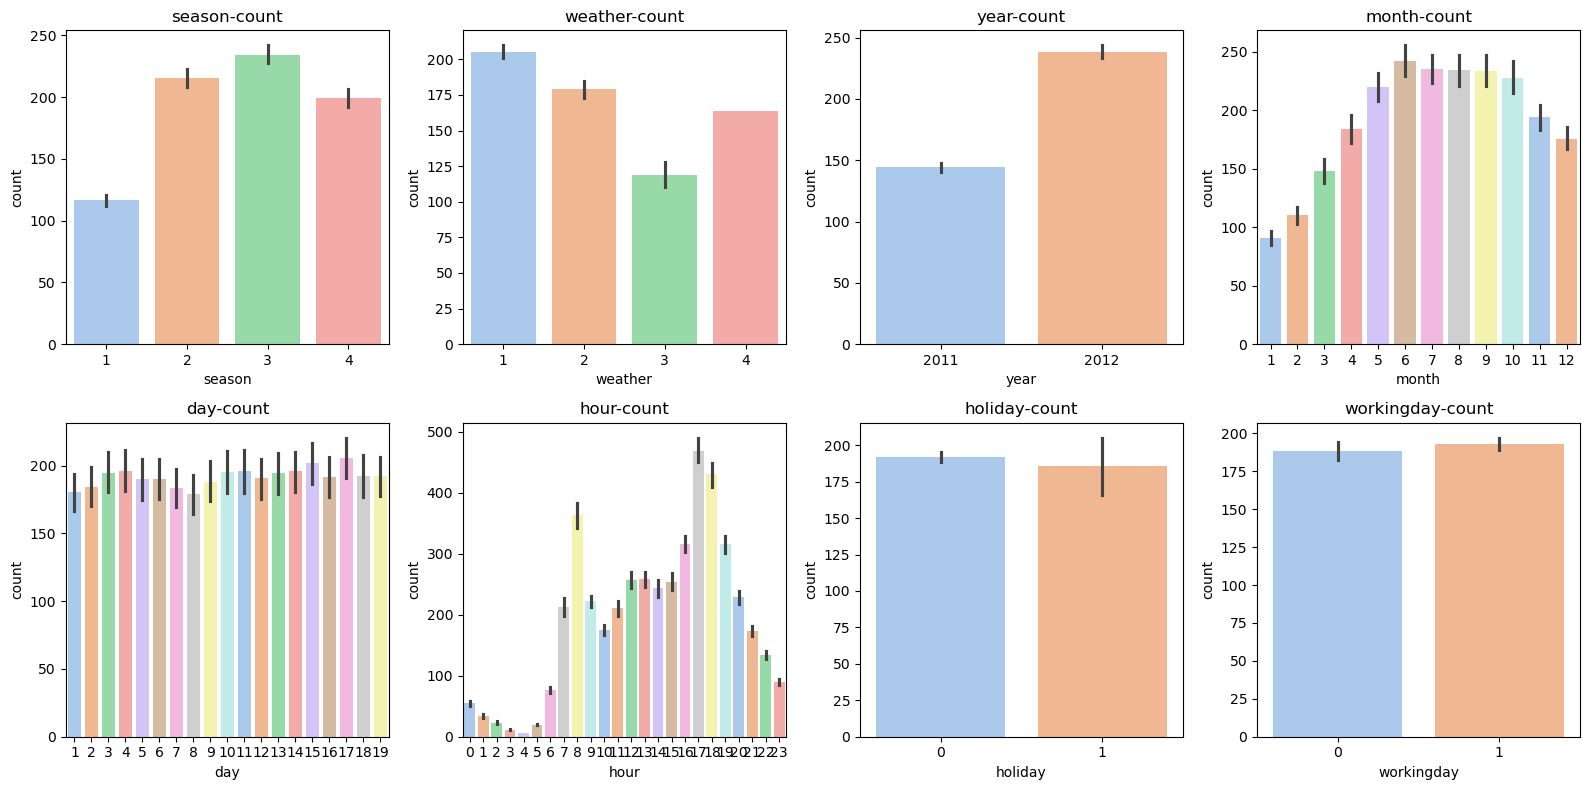

In [76]:
# 막대 그래프(년, 월, 시즌, 날씨, 일, 시간, 휴일, 근무일)
plt.figure(figsize=(16,8))
features = ['season', 'weather', 'year', 'month', 'day', 'hour', 'holiday', 'workingday']

for i, feature in enumerate(features):
    plt.subplot(2, 4, i+1)
    sns.barplot(x=feature, y='count', data=bike_df, palette='pastel')
    plt.title(feature+'-count')
plt.tight_layout()
plt.show()

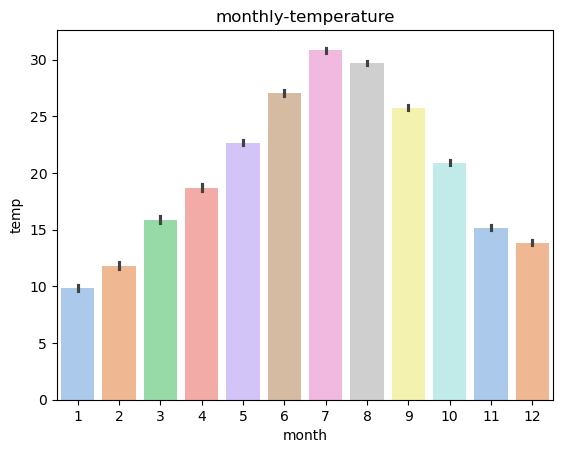

In [80]:
# 월별 평균 기온(temp) 시각화
# barkplot은 자동으로 그룹별 평균을 계산해준다
# temp: 실제 기온 (실제 측정된 온도), atemp: 체감 온도 (사람이 느끼는 온도)

sns.barplot(x='month', y='temp', data=bike_df, palette='pastel')
plt.title('monthly-temperature')
plt.show()

In [ ]:
# bike_df 데이터프레임에서 'month'랑 'season' 두 열만 선택하고, 중복된 행을 제거함
bike_df[['month', 'season']].drop_duplicates()

,month,season
0,1,1
431,2,1
877,3,1
1323,4,2
1778,5,2
2234,6,2
2690,7,3
3146,8,3
3602,9,3
4055,10,4


<Axes: title={'center': 'average temperature by month'}, xlabel='month', ylabel='mean temp'>

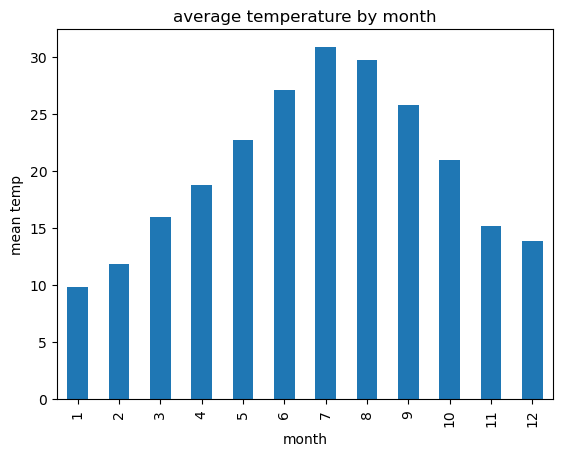

In [86]:
bike_df.groupby('month')['temp'].mean().plot.bar(ylabel='mean temp', xlabel='month', title='average temperature by month')

<Axes: >

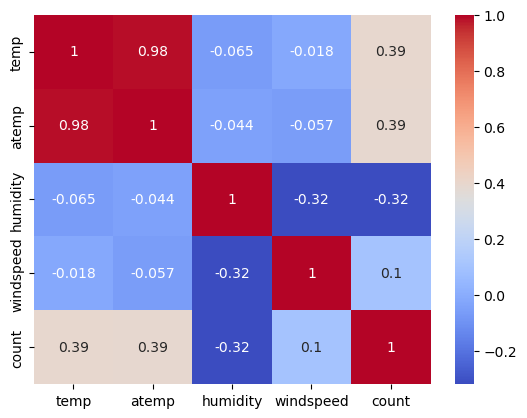

In [90]:
corr = bike_df[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
# 의미 도출

In [91]:
bike_df.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,5


In [93]:
# 변수선택
X = bike_df.drop(['count', 'day', 'temp'], axis=1).copy()
y = bike_df['count']

In [ ]:
# 훈련세트/테스트세트 분할 -> 전처리 하기 전의 데이터를 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [108]:
# LinearRegressor 모델 생성 및 훈련
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

model1.fit(X_train, y_train)

# 예측
y_pred1 = model1.predict(X_test)

# 평가
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred1)
rmse = root_mean_squared_error(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)

# r2, rmse, mae, mse
print(f"r2: {r2:.4f}")
print(f"rmse: {rmse:.4f}")
print(f"mae: {mae:.4f}")
print(f"mse: {mse:.4f}")

r2: 0.3863
rmse: 141.3202
mae: 105.6743
mse: 19971.4032


In [ ]:
# KNeighborsRegressor, DecisionTreeRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 모델 생성
model2 = KNeighborsRegressor()
model3 = DecisionTreeRegressor(random_state=42)
model4 = RandomForestRegressor(random_state=42)

# 훈련
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

# 예측
y_pred2 = model2.predict(X_test)
print("R2:", r2_score(y_test, y_pred2))
print("MSE:", mean_squared_error(y_test, y_pred2))

y_pred3 = model3.predict(X_test)
print("R2:", r2_score(y_test, y_pred3))
print("MSE:", mean_squared_error(y_test, y_pred3))

y_pred4 = model4.predict(X_test)
print("R2:", r2_score(y_test, y_pred4))
print("MSE:", mean_squared_error(y_test, y_pred4))



R2: 0.5867270514714753
MSE: 13448.02372320882
R2: 0.8978492081509479
MSE: 3324.0169167176973
R2: 0.9508793326016547
MSE: 1598.4010151760606


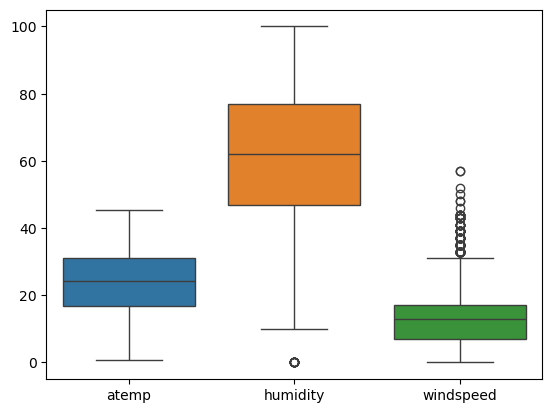

In [ ]:
# 수치형변수 스케일링 
sns.boxplot(X_train[['atemp', 'humidity', 'windspeed']])

In [111]:
from sklearn.preprocessing import StandardScaler 

features = ['atemp', 'humidity', 'windspeed']

scaler = StandardScaler()
X_train[features] = scaler.fit_transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])

In [121]:
# 범주형변수 원핫인코딩
# 봄, 여름, 가을, 겨울 등 (범주형 변수)를 숫자 0과 1로 구성된 여러 개의 이진 벡터로 변환하는 방법

from sklearn.preprocessing import OneHotEncoder

features = ['season', 'weather', 'year', 'month', 'hour', 'dayofweek']

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_ohe = ohe.fit_transform(X_train[features])
X_test_ohe = ohe.transform(X_test[features])

ohe_columns = ohe.get_feature_names_out(features)

X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe_columns, index=X_train.index)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe_columns, index=X_test.index)

X_train_preprocessed = pd.concat([X_train[features], X_train_ohe], axis=1)
X_test_preprocessed = pd.concat([X_test[features], X_test_ohe], axis=1)

X_train_preprocessed.sample(5)

,season,weather,year,month,hour,dayofweek,season_1,season_2,season_3,season_4,...,hour_21,hour_22,hour_23,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
6587,1,1,2012,3,18,6,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10526,4,1,2012,12,0,2,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9019,3,1,2012,8,4,5,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4966,4,1,2011,12,0,3,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7376,2,2,2012,5,17,6,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [138]:
# 파이프라인: 데이터 전처리와 모델 학습을 하나의 객체로 묶어서 관리할 수 있는 방법
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# 수치형, 범주형 변수 나누기
categorical_features = ['season', 'weather', 'year', 'month', 'hour', 'dayofweek']
numerical_feautures = ['atemp', 'humidity', 'windspeed']

# 컬람별 전처리 정의
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features), 
        ('num', StandardScaler(), numerical_feautures)
    ],
    remainder='passthrough' # 나머지 컬럼은 그대로 유지하고 해당하는 컬럼만 작업함
)

# 전체 파이프라인 구성
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor), # 전처리
    ('regressor', LinearRegression()) # 모델
])

pipeline.fit(X_train, y_train)
pipeline.predict(X_test)

array([ 232.92967857,   16.03305188,  350.8695075 , ...,  278.08501666,
        511.68426198, -211.80509855], shape=(3266,))

In [ ]:
# 최종 훈련 테스트 데이터 만들어서 모델 생성 및 훈련

# 불필요한 범주형 원본 제거
X_train_final = X_train_preprocessed.drop(features, axis=1)
X_test_final = X_test_preprocessed.drop(features, axis=1)

# 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train_final, y_train)

# 예측 및 평가
print("r2:", r2_score(y_test, model.predict(X_test_final)))
print("rmse:", root_mean_squared_error(y_test, model.predict(X_test_final)))
print("mse:", mean_squared_error(y_test, model.predict(X_test_final)))
print("mae:", mean_absolute_error(y_test, model.predict(X_test_final)))

r2: 0.6682215501918287
rmse: 103.9046133799307
mse: 10796.168681632873
mae: 76.28379339878063


In [137]:
# 새로운 데이터 예측 하기 
new_row = {
    "season": 2, "holiday": 0, "workingday": 1, "weather": 1,
    "atemp": 20.5, "humidity": 55, "windspeed": 0.12,
    "year": 2025, "month": 5, "day": 1, "hour": 17, "dayofweek": 3
}

new_df = pd.DataFrame([new_row])

# 예측
count_pred = pipeline.predict(new_df)[0]

# 출력
print(f"예상 대여 수: {count_pred:.0f}대")

예상 대여 수: 375대
